In [2]:
from fmp_module import *
%matplotlib inline

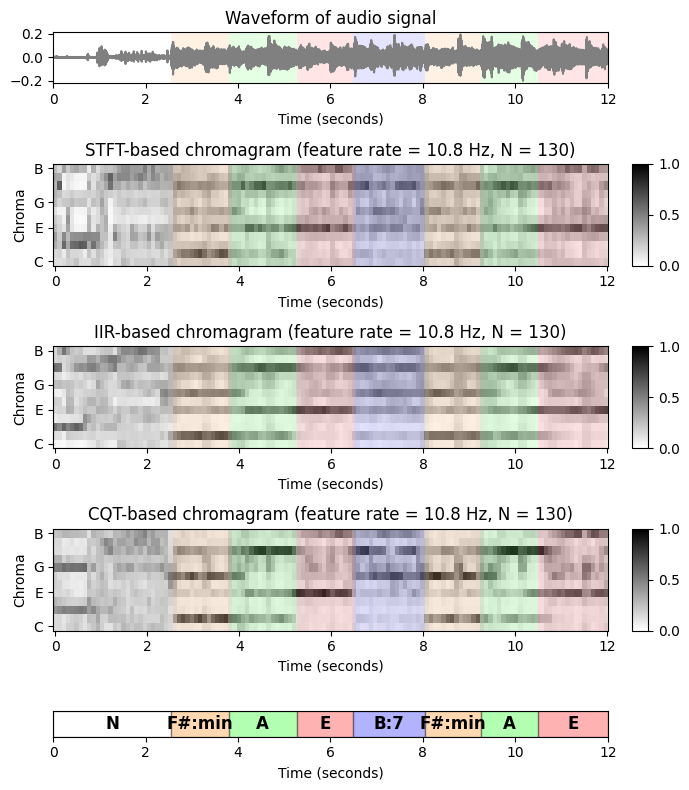

In [3]:
# Compute chroma features
#fn_wav = 'FMP_C5_F01_Beatles_LetItBe-mm1-4_Original.wav'
fn_wav = 'Data\Oasis - Wonderwall.wav'
N = 4096
H = 2048
X_STFT, Fs_X, x, Fs, x_dur = compute_chromagram_from_filename(fn_wav, N=N, H=H, gamma=0.1, version='STFT')
X_IIR, Fs_X, x, Fs, x_dur = compute_chromagram_from_filename(fn_wav, N=N, H=H, gamma=100, version='IIR')
X_CQT, Fs_X, x, Fs, x_dur = compute_chromagram_from_filename(fn_wav, N=N, H=H, version='CQT')

# Annotations
#fn_ann = 'FMP_C5_F01_Beatles_LetItBe-mm1-4_Original_Chords_simplified.csv'
fn_ann = 'Data\wonderwal_labels.csv'
ann, _ = libfmp.c4.read_structure_annotation(fn_ann)
color_ann = {'N': [1, 1, 1, 1], 'F#:min': [1, 0.5, 0, 1], 'A': [0, 1, 0, 1], 
             'E': [1, 0, 0, 1], 'B:7': [0, 0, 1, 1]}

# Plot
cmap = libfmp.b.compressed_gray_cmap(alpha=1, reverse=False)
fig, ax = plt.subplots(5, 2, gridspec_kw={'width_ratios': [1, 0.03], 
                                          'height_ratios': [1, 2, 2, 2, 0.5]}, figsize=(7, 8))
libfmp.b.plot_signal(x, Fs, ax=ax[0,0], title='Waveform of audio signal')
libfmp.b.plot_segments_overlay(ann, ax=ax[0,0], time_max=x_dur,
                               print_labels=False, colors=color_ann, alpha=0.1)
ax[0,1].axis('off')

title = 'STFT-based chromagram (feature rate = %0.1f Hz, N = %d)'%(Fs_X, X_STFT.shape[1])
plot_chromagram_annotation([ax[1, 0], ax[1, 1]], X_STFT, Fs_X, ann, color_ann, x_dur, title=title)

title = 'IIR-based chromagram (feature rate = %0.1f Hz, N = %d)'%(Fs_X, X_IIR.shape[1])
plot_chromagram_annotation([ax[2, 0], ax[2, 1]], X_IIR, Fs_X, ann, color_ann, x_dur, title=title)

title = 'CQT-based chromagram (feature rate = %0.1f Hz, N = %d)'%(Fs_X, X_CQT.shape[1])
plot_chromagram_annotation([ax[3, 0], ax[3, 1]], X_CQT, Fs_X, ann, color_ann, x_dur, title=title)

libfmp.b.plot_segments(ann, ax=ax[4, 0], time_max=x_dur, time_label='Time (seconds)',
                       colors=color_ann,  alpha=0.3)
ax[4,1].axis('off')
plt.tight_layout()

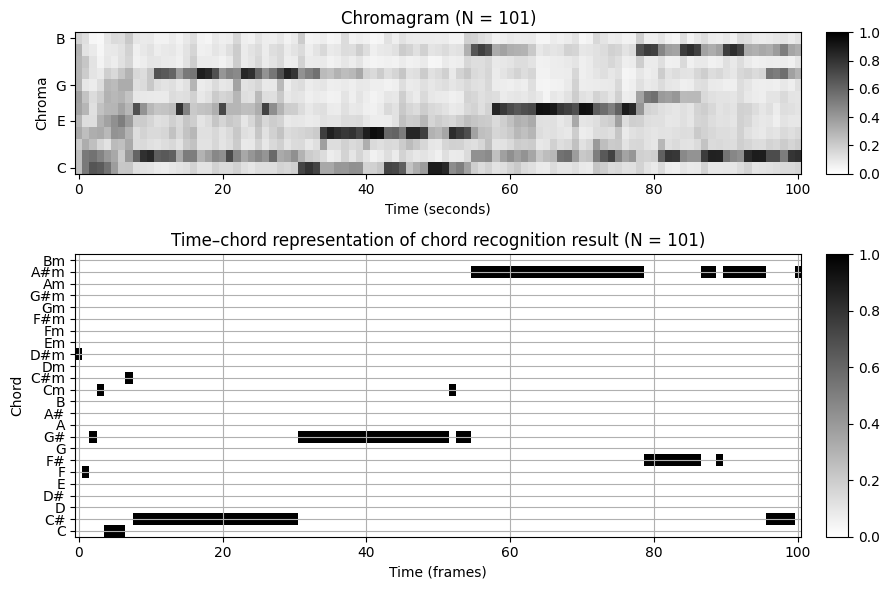

In [4]:
# Compute chromagram
#fn_wav = os.path.join('..', 'data', 'C5', 'FMP_C5_F01_Beatles_LetItBe-mm1-4_Original.wav')
fn_wav = 'Data\Lewis Capaldi - Someone You Loved.wav'
N = 4096
H = 2048
#X, Fs_X, x, Fs, x_dur = libfmp.c5.compute_chromagram_from_filename(fn_wav, N=N, H=H, gamma=0.1, version='STFT')
#X, Fs_X, x, Fs, x_dur = libfmp.c5.compute_chromagram_from_filename(fn_wav, N=N, H=H, gamma=100, version='IIR')
X, Fs_X, x, Fs, x_dur = libfmp.c5.compute_chromagram_from_filename(fn_wav, N=N, H=H, version='CQT')

# Chord recognition
chord_sim, chord_max = libfmp.c5.chord_recognition_template(X, norm_sim='max')
chord_labels = libfmp.c5.get_chord_labels()

#Plot
fig, ax = plt.subplots(2, 2, gridspec_kw={'width_ratios': [1, 0.03], 
                                          'height_ratios': [1, 2]}, figsize=(9, 6))

title = 'Chromagram (N = %d)' % X.shape[1]
libfmp.b.plot_chromagram(X, Fs=1, ax=[ax[0, 0], ax[0, 1]],
                         chroma_yticks = [0, 4, 7, 11], clim=[0, 1], cmap='gray_r',
                         title=title, ylabel='Chroma', colorbar=True)

title = 'Time–chord representation of chord recognition result (N = %d)' % X.shape[1]
libfmp.b.plot_matrix(chord_max, ax=[ax[1, 0], ax[1, 1]], Fs=1, 
                     title=title, ylabel='Chord', xlabel='Time (frames)')
ax[1, 0].set_yticks(np.arange(len(chord_labels)))
ax[1, 0].set_yticklabels(chord_labels)
ax[1, 0].grid()
plt.tight_layout()

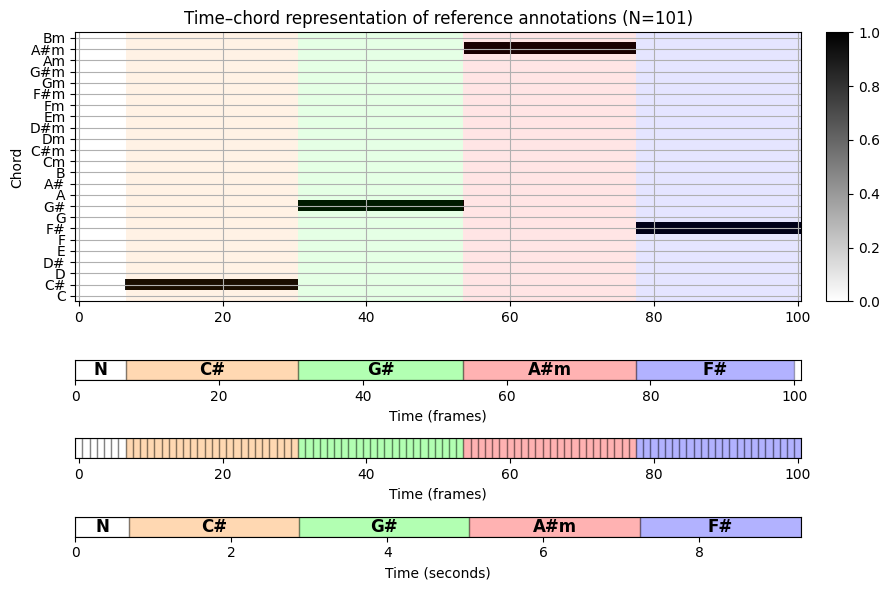

In [5]:
# Annotations
#fn_ann = os.path.join('..', 'data', 'C5', 'FMP_C5_F01_Beatles_LetItBe-mm1-4_Original_Chords_simplified.csv')
fn_ann = 'Data\someone_you_loved_labels.csv'
chord_labels = libfmp.c5.get_chord_labels(ext_minor='m', nonchord=False)
N_X = X.shape[1]
ann_matrix, ann_frame, ann_seg_frame, ann_seg_ind, ann_seg_sec = convert_chord_ann_matrix(fn_ann, chord_labels, 
                                                                           Fs=Fs_X, N=N_X, last=True)

color_ann = {'C#': [1, 0.5, 0, 1], 'G#': [0, 1, 0, 1], 
             'A#m': [1, 0, 0, 1], 'F#': [0, 0, 1, 1], 'N': [1, 1, 1, 1]}

# Plot
cmap = libfmp.b.compressed_gray_cmap(alpha=1, reverse=False)
fig, ax = plt.subplots(4, 2, gridspec_kw={'width_ratios': [1, 0.03], 
                                          'height_ratios': [4, 0.3, 0.3, 0.3]}, 
                       figsize=(9, 6))

libfmp.b.plot_matrix(ann_matrix, ax=[ax[0, 0], ax[0, 1]], Fs=1, 
                     title='Time–chord representation of reference annotations (N=%d)' % ann_matrix.shape[1],
                     ylabel='Chord', xlabel='')
ax[0, 0].set_yticks(np.arange( len(chord_labels) ))
ax[0, 0].set_yticklabels(chord_labels)
libfmp.b.plot_segments_overlay(ann_seg_frame, ax=ax[0, 0], 
                               print_labels=False, colors=color_ann, alpha=0.1)
ax[0, 0].grid()
libfmp.b.plot_segments(ann_seg_ind, ax=ax[1, 0], time_label='Time (frames)', time_max=N_X,
                       colors=color_ann,  alpha=0.3)
ax[1, 1].axis('off')
libfmp.b.plot_segments(ann_seg_frame, ax=ax[2, 0], time_label='Time (frames)', 
                       colors=color_ann,  alpha=0.3, print_labels=False)
ax[2, 1].axis('off')
libfmp.b.plot_segments(ann_seg_sec, ax=ax[3, 0], time_max=x_dur, time_label='Time (seconds)',
                       colors=color_ann,  alpha=0.3)
ax[3, 1].axis('off')
plt.tight_layout()

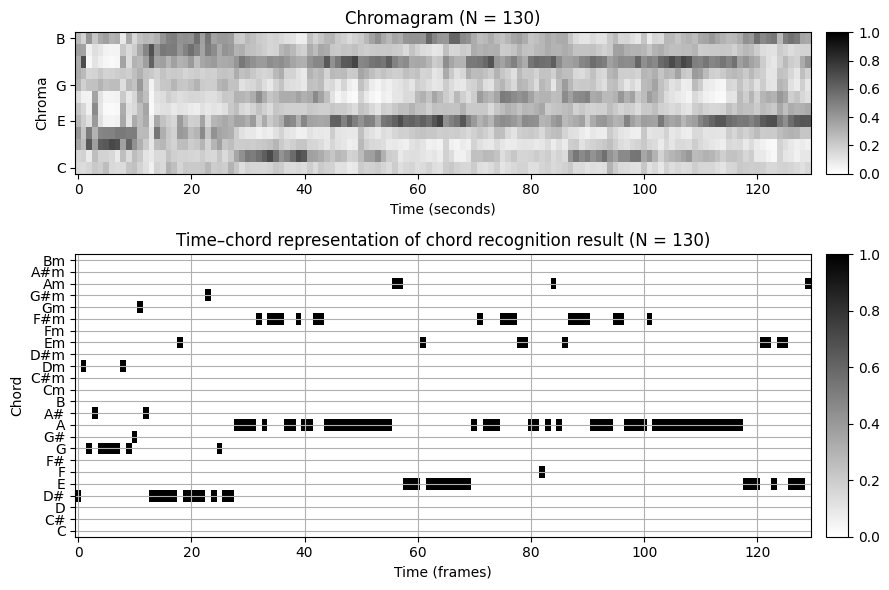

In [6]:
# Compute chromagram
#fn_wav = os.path.join('..', 'data', 'C5', 'FMP_C5_F01_Beatles_LetItBe-mm1-4_Original.wav')
fn_wav = 'Data\Oasis - Wonderwall.wav'
N = 4096
H = 2048
X, Fs_X, x, Fs, x_dur = libfmp.c5.compute_chromagram_from_filename(fn_wav, N=N, H=H, gamma=0.1, version='STFT')
#X, Fs_X, x, Fs, x_dur = libfmp.c5.compute_chromagram_from_filename(fn_wav, N=N, H=H, gamma=100, version='IIR')
#X, Fs_X, x, Fs, x_dur = libfmp.c5.compute_chromagram_from_filename(fn_wav, N=N, H=H, version='CQT')

# Chord recognition
chord_sim, chord_max = libfmp.c5.chord_recognition_template(X, norm_sim='max')
chord_labels = libfmp.c5.get_chord_labels()

#Plot
fig, ax = plt.subplots(2, 2, gridspec_kw={'width_ratios': [1, 0.03], 
                                          'height_ratios': [1, 2]}, figsize=(9, 6))

title = 'Chromagram (N = %d)' % X.shape[1]
libfmp.b.plot_chromagram(X, Fs=1, ax=[ax[0, 0], ax[0, 1]],
                         chroma_yticks = [0, 4, 7, 11], clim=[0, 1], cmap='gray_r',
                         title=title, ylabel='Chroma', colorbar=True)

title = 'Time–chord representation of chord recognition result (N = %d)' % X.shape[1]
libfmp.b.plot_matrix(chord_max, ax=[ax[1, 0], ax[1, 1]], Fs=1, 
                     title=title, ylabel='Chord', xlabel='Time (frames)')
ax[1, 0].set_yticks(np.arange(len(chord_labels)))
ax[1, 0].set_yticklabels(chord_labels)
ax[1, 0].grid()
plt.tight_layout()

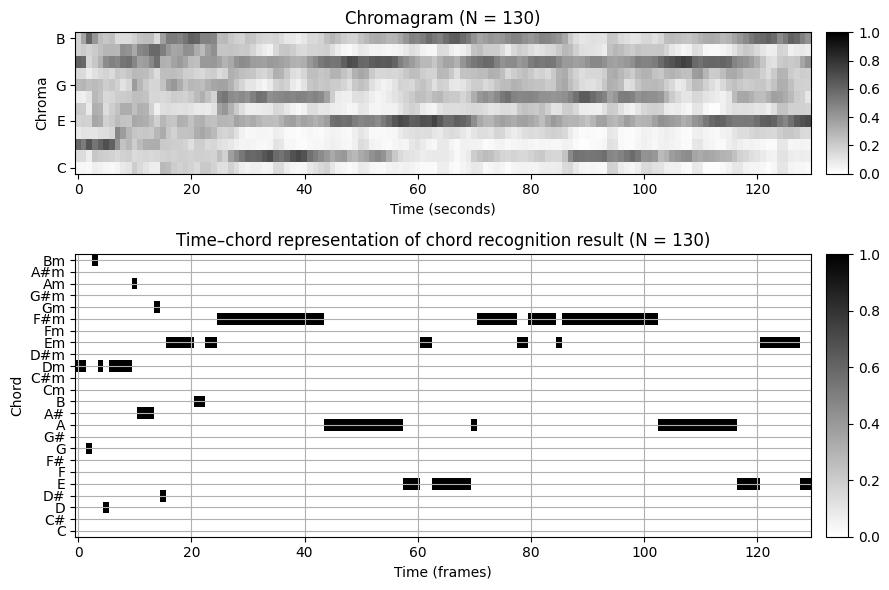

In [7]:
# Compute chromagram
#fn_wav = os.path.join('..', 'data', 'C5', 'FMP_C5_F01_Beatles_LetItBe-mm1-4_Original.wav')
fn_wav = 'Data\Oasis - Wonderwall.wav'
N = 4096
H = 2048
#X, Fs_X, x, Fs, x_dur = libfmp.c5.compute_chromagram_from_filename(fn_wav, N=N, H=H, gamma=0.1, version='STFT')
X, Fs_X, x, Fs, x_dur = libfmp.c5.compute_chromagram_from_filename(fn_wav, N=N, H=H, gamma=100, version='IIR')
#X, Fs_X, x, Fs, x_dur = libfmp.c5.compute_chromagram_from_filename(fn_wav, N=N, H=H, version='CQT')

# Chord recognition
chord_sim, chord_max = libfmp.c5.chord_recognition_template(X, norm_sim='max')
chord_labels = libfmp.c5.get_chord_labels()

#Plot
fig, ax = plt.subplots(2, 2, gridspec_kw={'width_ratios': [1, 0.03], 
                                          'height_ratios': [1, 2]}, figsize=(9, 6))

title = 'Chromagram (N = %d)' % X.shape[1]
libfmp.b.plot_chromagram(X, Fs=1, ax=[ax[0, 0], ax[0, 1]],
                         chroma_yticks = [0, 4, 7, 11], clim=[0, 1], cmap='gray_r',
                         title=title, ylabel='Chroma', colorbar=True)

title = 'Time–chord representation of chord recognition result (N = %d)' % X.shape[1]
libfmp.b.plot_matrix(chord_max, ax=[ax[1, 0], ax[1, 1]], Fs=1, 
                     title=title, ylabel='Chord', xlabel='Time (frames)')
ax[1, 0].set_yticks(np.arange(len(chord_labels)))
ax[1, 0].set_yticklabels(chord_labels)
ax[1, 0].grid()
plt.tight_layout()

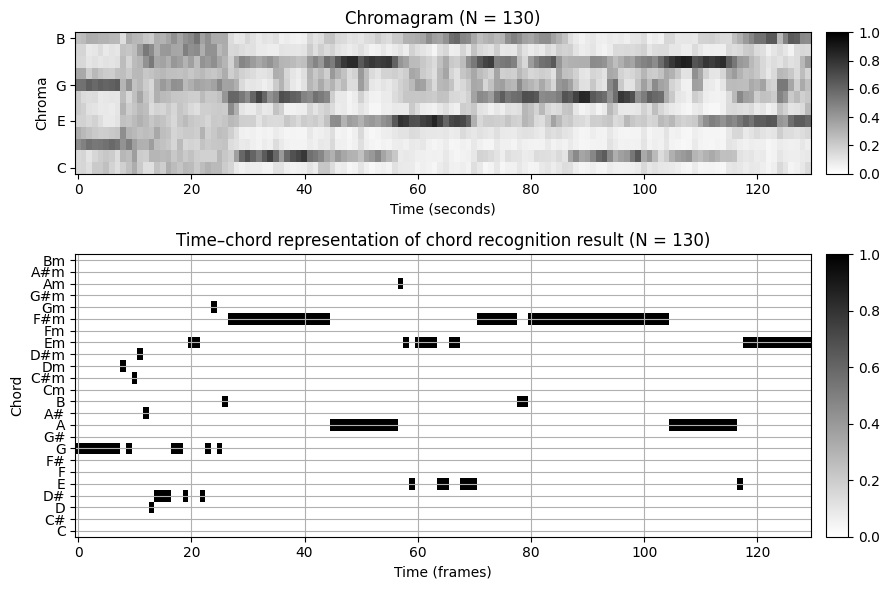

In [8]:
# Compute chromagram
#fn_wav = os.path.join('..', 'data', 'C5', 'FMP_C5_F01_Beatles_LetItBe-mm1-4_Original.wav')
fn_wav = 'Data\Oasis - Wonderwall.wav'
N = 4096
H = 2048
#X, Fs_X, x, Fs, x_dur = libfmp.c5.compute_chromagram_from_filename(fn_wav, N=N, H=H, gamma=0.1, version='STFT')
#X, Fs_X, x, Fs, x_dur = libfmp.c5.compute_chromagram_from_filename(fn_wav, N=N, H=H, gamma=100, version='IIR')
X, Fs_X, x, Fs, x_dur = libfmp.c5.compute_chromagram_from_filename(fn_wav, N=N, H=H, version='CQT')

# Chord recognition
chord_sim, chord_max = libfmp.c5.chord_recognition_template(X, norm_sim='max')
chord_labels = libfmp.c5.get_chord_labels()

#Plot
fig, ax = plt.subplots(2, 2, gridspec_kw={'width_ratios': [1, 0.03], 
                                          'height_ratios': [1, 2]}, figsize=(9, 6))

title = 'Chromagram (N = %d)' % X.shape[1]
libfmp.b.plot_chromagram(X, Fs=1, ax=[ax[0, 0], ax[0, 1]],
                         chroma_yticks = [0, 4, 7, 11], clim=[0, 1], cmap='gray_r',
                         title=title, ylabel='Chroma', colorbar=True)

title = 'Time–chord representation of chord recognition result (N = %d)' % X.shape[1]
libfmp.b.plot_matrix(chord_max, ax=[ax[1, 0], ax[1, 1]], Fs=1, 
                     title=title, ylabel='Chord', xlabel='Time (frames)')
ax[1, 0].set_yticks(np.arange(len(chord_labels)))
ax[1, 0].set_yticklabels(chord_labels)
ax[1, 0].grid()
plt.tight_layout()